<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

# Statistics: Hypothesis Testing Notebook

This notebook provides an overview of fundemantal statistics used in data science specifically hypothesis testing. The purpose is not to discuss the theory behind statistical methods but to introduce the student to those statisticsal methods relevant to data science.

# Table of Contents

[Python Libraries Used in this Notebook](#Python-Libraries-Used-in-this-Notebook)

[Introduction to Hypothesis Testing](#Introduction-to-Hypothesis-Testing)

[Statistical Tests](#Statistical-Tests)

- [Chi-Square Test](#Chi-Square-Test)
- [Fisher's exact test](#Fisher's-exact-test)
- [T-Test: Paired or Independent (Unpaired) Data](#T-Test:-Paired-or-Independent-(Unpaired)-Data)
- [Welch's t-test](#Welch's-t-test)
- [ANOVA (Analysis of variance)](#ANOVA-(Analysis-of-variance))
- [Regression Analysis](#Regression-Analysis)

[Test Selection](#Test-Selection)

[Correlation and Covariance](#Correlation-and-Covariance)

[Titanic Survival Data Analysis Example](#Titanic-Survival-Data-Analysis-Example)

- [Analysis of Class](#Analysis-of-Class)
- [Analysis of Passenger Biological Sex](#Analysis-of-Passenger-Biological-Sex)

[T-Test Example](#T-Test-Example)

- [Example-1](#Example-1)

[Theory of Extramarital Affairs Data Example](#Theory-of-Extramarital-Affairs-Data-Example)

- [Study-1: Poor Marriages](#Study-1:-Poor-Marriages)

- [Study-2: Occupations](#Study-2:-Occupations)

[Welch's t-test vs. Student's t-test Example (OPTIONAL)](#Welch's-t-test-vs.-Student's-t-test-Example-(OPTIONAL))

[ANOVA Example](#ANOVA-Example)

# Python Libraries Used in this Notebook
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats.distributions import chi2

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Introduction to Hypothesis Testing
[Return to Table of Contents](#Table-of-Contents)

Hypothesis testing allows us to __infer the probabilistic relationship between parameters and features in a dataset__. As the name implies, it allows us to test how plausible is a hypothesis given the data. Hypothesis testing is an objective method of making decisions or inferences from sample data (evidence). 

Sample data used to choose between two choices (i.e. hypotheses or statements about a population). We typically do this by comparing what we have observed to what we expected if one of the statements (Null Hypothesis) was true.

- Hypothesis-1: There is a difference between vaccinated and not vaccinated people, so I accept to get vaccinated 
- Hypothesis-2: There is no difference between vaccinated and not vaccinated people, so I refuse to get vaccinated

#### Hypothesis testing framework:
Always two hypotheses: <br>
$H_0$: Null Hypothesis: <br>
- What we assume is true to begin with
- Typically that there is no difference/effect/relationship

$H_A$: Research (Alternative) Hypothesis: <br>
- What we aim to gather evidence of
- Typically that there is a difference/effect/relationship etc.<br>

#### Example: Court
Members of a jury have to decide whether a person is guilty or innocent based on evidence. <br>
Hypothesis Testing Framework:
- Null: The person is innocent
- Alternative: The person is not innocent (i.e. guilty)

__The null can only be rejected if there is enough evidence to doubt it (i.e. the jury can only convict if there is beyond 
reasonable doubt for the null of innocence). They do not know whether the person is really guilty or innocent so they may make a mistake.__

Types of errors: (In machine learning the confusion matrix is similar and used to evaluate true/false positives/negatives)
- Type I error (or false-positive) occurs when an analyst rejects a null hypothesis that is actually true in the population.
- Type II error (or false-negative) occurs when an analyst fails to reject a null hypothesis that is actually false in the population.

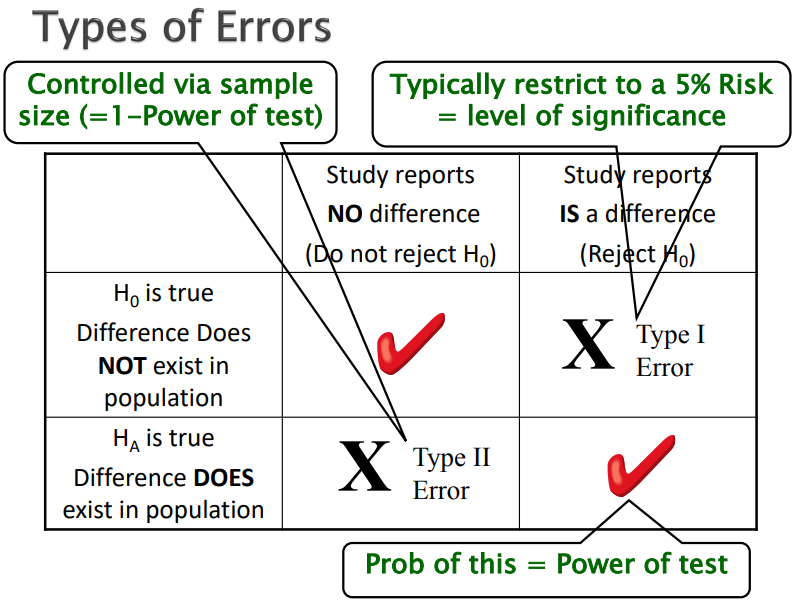
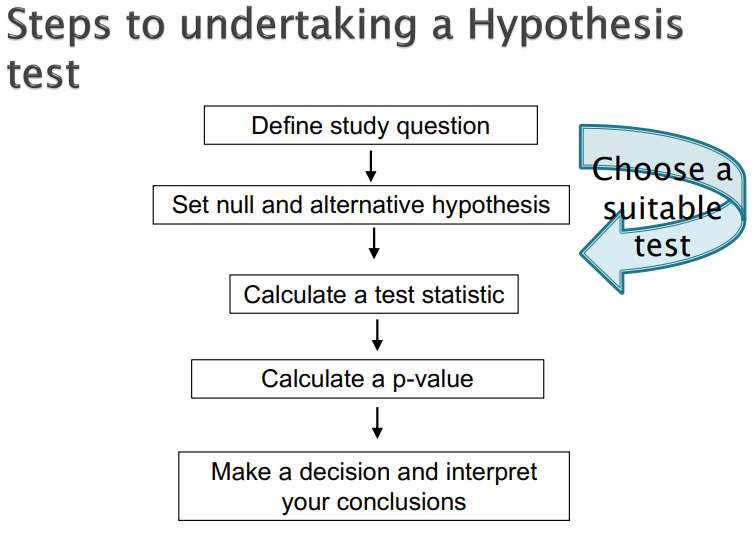

# Statistical Tests
[Return to Table of Contents](#Table-of-Contents)

Each statistical test in this section is used to infer relationships of various types of features. The section and table below on Test Selection example provide a summary of each test and type of variables. 

### Chi-Square Test
The chi-squared test is used when we want to see if two categorical variables are related. The test statistic for the Chi-squared test uses the sum of the squared differences between each pair of observed (O) and expected values (E).
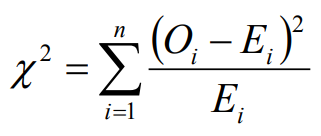
Chi-squared test assume chi-squared distribution. Depending on the degrees of freedom, Chi-squared value can be converted
into a p-value.

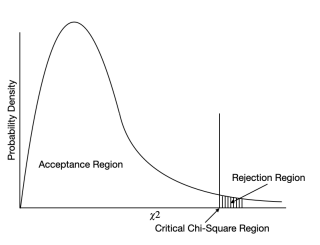
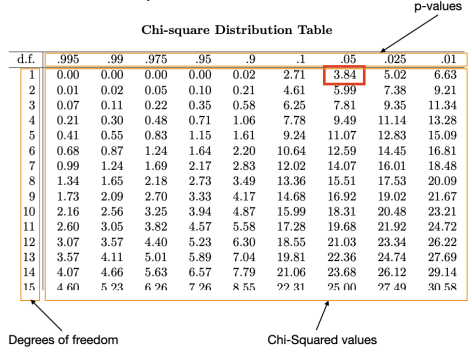

P-value: Probability of getting a test statistic at least as extreme as the one calculated if the null is true. The p-value is calculated using the Chi-squared distribution for this test. Chi-squared is a skewed distribution which varies depending on the degrees of freedom.

Decision Rule:
One part of the output is the p-value (P): 
- If P < 0.05 reject $H_0$ => Evidence of $H_A$ is true (i.e., IS association)
- If P > 0.05 do not reject $H_0$ (i.e., NO association)

Check the number of cells with EXPECTED counts less than 5. If this number corresponds to 20% or higher, then the test statistic does not approximate a chi-squared distribution very well. In this case if we have a 2x2 table, then use Fishers’ Exact test. For larger tables (3x2 etc.), combine categories to make cell counts larger (providing it’s meaningful).

###  Fisher's exact test
Fisher’s Exact Test is a statistical test used to determine if the proportions of categories in two group variables significantly differ from each other.

Documentation References:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html

### T-Test: Paired or Independent (Unpaired) Data
Test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean.

Documentation References:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
https://www.reneshbedre.com/blog/ttest.html

### Welch's t-test 
Used to test the hypothesis that two populations have equal means. More reliable when the two samples have unequal variances and possibly unequal sample sizes.

Documentation References:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

### ANOVA (Analysis of variance)
__ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups). Compares the variation between groups relative to variation within groups. Uses variance-based F test to check the group mean equality.__ Sometimes, ANOVA F test is also called omnibus test as it tests non-specific null hypothesis (i.e., all group means are equal).
- Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
- It is also called univariate ANOVA as there is only one dependent variable in the model. MANOVA is used when there are multiple dependent variables in the dataset. If there is an additional continuous independent variable in the model, then ANCOVA is used.
- If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA

Population variance estimated in two ways:
- Based on variation between groups we call the  Mean Square due to Treatments (MST or MS_between)
- Based on variation within groups we call the Mean Square due to Error (MSE or MS_within)

Within group variation:
- Residual = difference between an individual and their group mean
- SS_within = sum of squared residuals

Between group variation: Differences between each group mean and the overall mean.

Null hypothesis: Groups means are equal (no variation in means of groups)
- $H_0$: $\mu_1 = \mu_2 = \cdots \mu_p$
- $H_A$: At least, one group mean is different from other groups (i.e., All $\mu$'s are not equal). <br>

The null hypothesis is tested using the omnibus test (F test) for all groups, which is further followed by post-hoc test to see individual group differences.

Assumptions for ANOVA:
- Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)
- Homoscedasticity or Homogeneity of variances: variances are equal between treatment groups (Levene’s, Bartlett’s, or Brown-Forsythe test)
- Observations are sampled independently from each other: no relation in observations between the groups and within the groups (i.e., each subject should have only one response)
- The dependent variable should be continuous. If the dependent variable is ordinal or rank, it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

ANOVA is a powerful method when the assumptions of normality and homogeneity of variances are valid. ANOVA is less powerful (little effect on type I error), if the assumption of normality is violated while variances are equal.
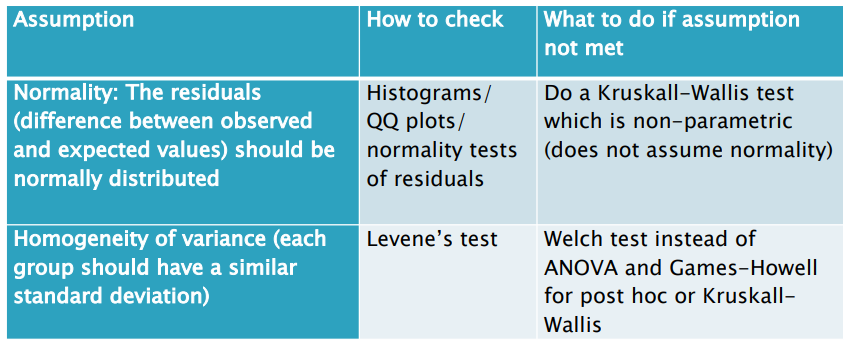

### Regression Analysis
Regressions (e.g., Linear, multiple linear, logistic, etc.) are used when there are one or more independent/dependent variables. Regression is useful when we want to look for significant relationships between two variables and predict a value of one variable for a given value of the other. It involves estimating the line of best fit through the data which minimises the sum of the squared residuals. 

Simple linear regression looks at the relationship between two Scale variables by producing an equation for a straight line of the form. $R^2$ is used to measure how reliable are the predicitons.


# Test Selection
[Return to Table of Contents](#Table-of-Contents)

Independent variables (explanatory/predictor) affect a dependent (outcome) variable. Variables can be scale or categorical. Categorical variables can be ordinal (data has a predetermined or natural order), or nominal (without natural order or rank).

Statistical tests fall into two types: Parametric tests and Non-parametric.
- Parametric tests assume data follows a particular distribution (e.g. normal)
- Nonparametric techniques are usually based on ranks or signs rather than actual data

## Test Selection Examples
### Tests to Compare Means
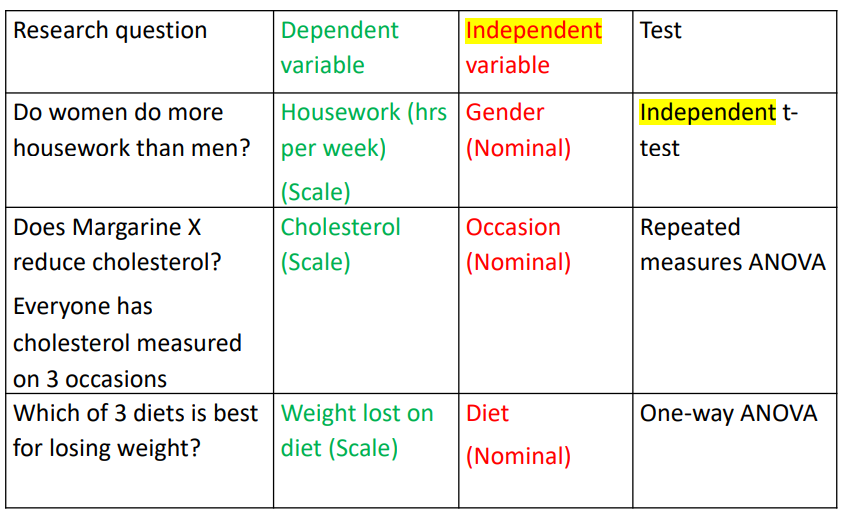
### Test to Investigate Relationships
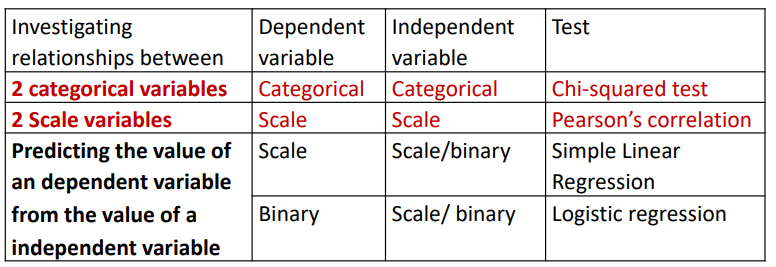
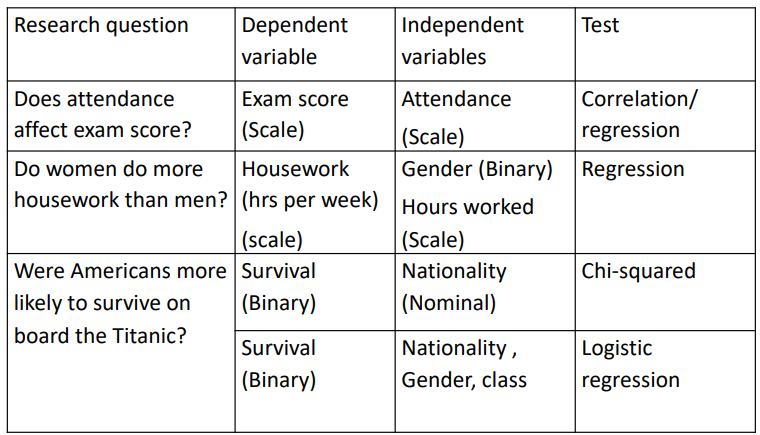
### Non-Parametric Tests
Non-parametric methods are used when data is ordinal and does not seem to follow any particular shape or 
distribution (e.g., normal), assumptions underlying parametric test are not met, a plot of the data appears to be very skewed, there are potential influential outliers in the dataset and the sample size is small.
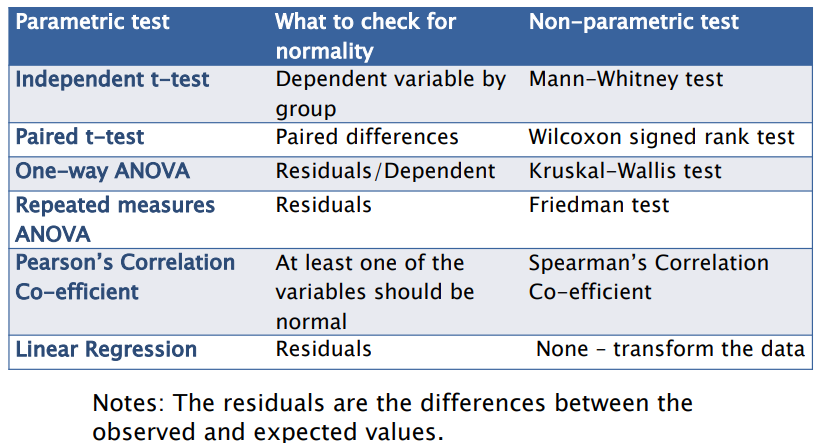

# Correlation and Covariance
[Return to Table of Contents](#Table-of-Contents)

<b>Correlation:</b> A measure of the strength of a relationship between data. Measures both the strength and direction of the linear relationship between two variables. 
$$\mathrm{r}(X, Y) = \frac{\sum\limits_{i}^{N}{(X_i – \mu_x)(Y_i – \mu_y)}}{{\sqrt{\sum\limits_{i}^{N}{(X_i – \mu_x)^2}\sum\limits_{i}^{N}{(Y_i – \mu_y)^2}}}} $$

<b>Covariance:</b> A measure of the variance between two variables. Indicates the direction of the linear relationship between variables.
$$\mathrm{cov}(X, Y) = \frac{1}{{N}} \sum\limits_{i}^{N}{(X_i – \mu_x)(Y_i – \mu_y)}$$

Both measure the relationship and the dependency between two variables. Typically, shown in a heatmap form wiht the values of correlation being standardized while the covariance IS NOT standardized.

# Titanic Survival Data Analysis Example
[Return to Table of Contents](#Table-of-Contents)

In [2]:
# Loading the titaniic dataset on how many people survived and information on them.
df = pd.read_csv('./input_data/titanic.csv')
print(df.shape)
df.head(4)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


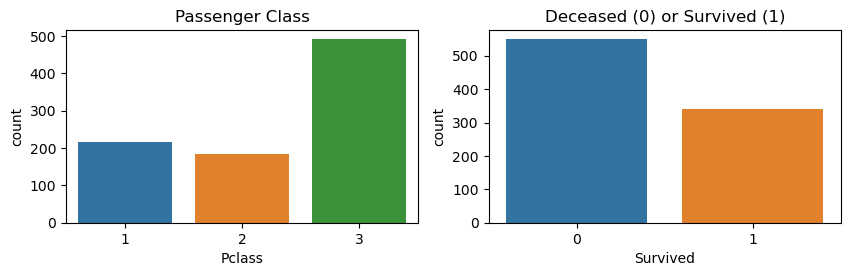

In [3]:
# Let's plot a few features: "Passenger class" and "Survived or not".
plt.figure(figsize=(10,2.5))

plt.subplot(121)
sns.countplot(data = df, x='Pclass')
plt.title("Passenger Class")

plt.subplot(122)
sns.countplot(data = df, x='Survived')
plt.title("Deceased (0) or Survived (1)")

plt.show()

In [4]:
# Let's do a pivot table of those same features: "PClass" and "Survived"
PClass_survd = pd.pivot_table(df,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


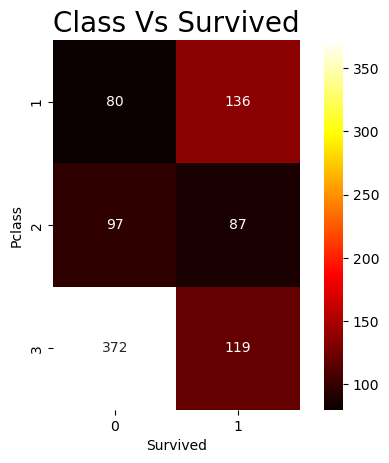

In [5]:
# Let's get a heatmap of the Pivot table.
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()

In [6]:
pct_class = PClass_survd.sum(axis=1)/df.shape[0] # Total of 891 passengers in the dataset.
pct_class

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

24% of total passengers in Class 1, <br>
20.65% of total passengers in Class 2 <br>
remaining 55.11% in Class 3.

In [7]:
pct_survived = PClass_survd.sum(axis=0)/891
pct_survived

Survived
0    0.616162
1    0.383838
dtype: float64

38.38% of total passeneger survived

### Analysis of Class
[Return to Table of Contents](#Table-of-Contents)

Null hypothesis: The survival does not depend on the class the passengers were travelling.

If this is true then we expect the distributions to have the same proportions in all columns, i.e.

In [8]:
# This is the number of people in all classes and survival history expected.
# Note the @ is called a decorator. Is another way to reference a function.
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


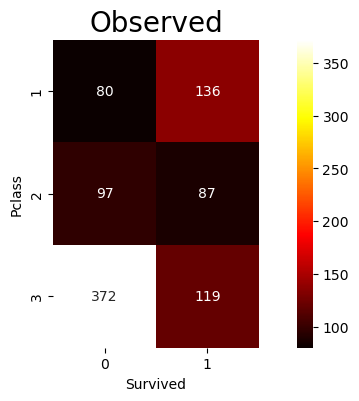

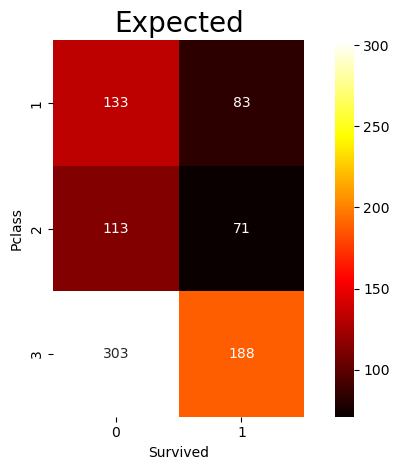

In [9]:
# Getting the tables of Class/Survival Observed/Expected as heatmaps.
plt.figure(figsize=(10,4))

#plt.subplot('121')
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)
plt.show();

#plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()

plt.show();

In [10]:
# Let's calculate the chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PClass_survd)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  102.88898875696056
P value is 4.549251711298793e-23
Degrees of Freedom: 2


P value is almost 0! we can reject the null hypothesis with confidence!

### Analysis of Passenger Biological Sex
Null Hypothesis: Survival rate is independant to Sex of a passenger.

Should we accept it or reject it?

In [11]:
groupedby_genderval = df.groupby('Survived')['Sex'].value_counts()
pivot_cont = pd.pivot_table(df[['Survived', 'Sex']], index = ['Survived'],columns = 'Sex', aggfunc = len)
pivot_cont

Sex,female,male
Survived,,
0,81,468
1,233,109


In [12]:
chi2, pval, dof, expected = stats.chi2_contingency(pivot_cont)

print('Chi-Squared value: ', chi2)
print('Probability for such a large value:',pval)

Chi-Squared value:  260.71702016732104
Probability for such a large value: 1.1973570627755645e-58


P value is almost 0! we can reject the null hypothesis with confidence!

# T-Test Example
[Return to Table of Contents](#Table-of-Contents)

The ttest_1samp calculates the T-test for the mean of ONE group of scores. This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

Documentation Reference:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

### Example-1
[Return to Table of Contents](#Table-of-Contents)

Compare two unrelated samples. Data was collected on the weight loss of 16 women and 20 men enrolled in a weight reduction program.
At $\alpha$ = 0.05, test whether the weight loss of these two samples is different.

In [13]:
Weight_loss_Male   = [3.69, 4.12, 4.65, 3.19,  4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92]
Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

#### Step 1: Define null and alternative hypotheses
In testing whether weight reduction of female and male are same,the null hypothesis states that mean weight reduction, $\mu{M}$ equals $\mu{F}$. The alternative hypthesis states that the weight reduction is different for Male and Female, $\mu{M}$ $\neq$ $\mu{F}$

* $H_0$: $\mu{M}$ - $\mu{F}$ =      0
* $H_A$: $\mu{M}$ - $\mu{F}$ $\neq$  0

#### Step 2: Decide the significance level
Here we select $\alpha$ = 0.05 and sample size < 30 and population standard deviation is not known.

#### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are not same.
* The sample is not a large sample, n < 30. So you use the t distribution and the `t-STAT` test statistic for two sample unpaired test.

#### Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [14]:
t_statistic, p_value  =  stats.ttest_ind(Weight_loss_Male, Weight_loss_Female)
print('P Value %1.3f' % p_value)

P Value 0.076


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.076 and it is more than 5% level of significance

The statistical decision is to accept the null hypothesis at 5% level of significance.

There is no sufficient evidence to reject the null hypothesis that the weight loss of these men and women is same.

# Theory of Extramarital Affairs Data Example
[Return to Table of Contents](#Table-of-Contents)

Paper: Ray Fair, "A Theory of Extramarital Affairs," Journal of Political Economy, February, 45-61, 1978.
(https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf)

This dataset included in statsmodels. 

In [15]:
# We will use the "Fair" dataset. Let's check the source and notes
print(sm.datasets.fair.SOURCE, sm.datasets.fair.NOTE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm
 ::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

In [16]:
# Let's load the data.
df_fair = sm.datasets.fair.load_pandas().data
df_fair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Note that the data is NOT normalized/scaled. The SciKit Learn library provides various functions fro scaling data (https://scikit-learn.org/stable/modules/preprocessing.html). Common scaling functions include [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler), and [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler). In some cases it may be beneficial to scale the data especially when using multiple features within a model.

In [56]:
# Describe function for statistics for numerical features.
df_fair.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [18]:
df_fair.var() # Variance for each feature.

rate_marriage       0.924347
age                46.893486
yrs_married        53.000147
children            2.054839
religious           0.771532
educ                4.743695
occupation          0.888115
occupation_husb     1.812888
affairs             4.854856
dtype: float64

In [19]:
df_fair.std() # Standard Deviation for each feature.

rate_marriage      0.961430
age                6.847882
yrs_married        7.280120
children           1.433471
religious          0.878369
educ               2.178003
occupation         0.942399
occupation_husb    1.346435
affairs            2.203374
dtype: float64

In [55]:
# Note that alternatively we can Transpose the output of Describe and select std feature.
df_fair.describe().T['std']

rate_marriage      0.961430
age                6.847882
yrs_married        7.280120
children           1.433471
religious          0.878369
educ               2.178003
occupation         0.942399
occupation_husb    1.346435
affairs            2.203374
Name: std, dtype: float64

In [20]:
# Coefficient of variation (CV): ratio of the standard deviation to the mean.
# A relative dispersion of data points in a data series around the mean.
df_fair.std()/df_fair.mean()

rate_marriage      0.233945
age                0.235461
yrs_married        0.808056
children           1.026199
religious          0.362039
educ               0.153274
occupation         0.275223
occupation_husb    0.349711
affairs            3.123696
dtype: float64

In [21]:
# Skewness: A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
df_fair.skew()

rate_marriage     -1.009710
age                0.576149
yrs_married        0.725854
children           0.890980
religious         -0.028350
educ               0.794714
occupation         0.343946
occupation_husb   -0.380442
affairs            8.764859
dtype: float64

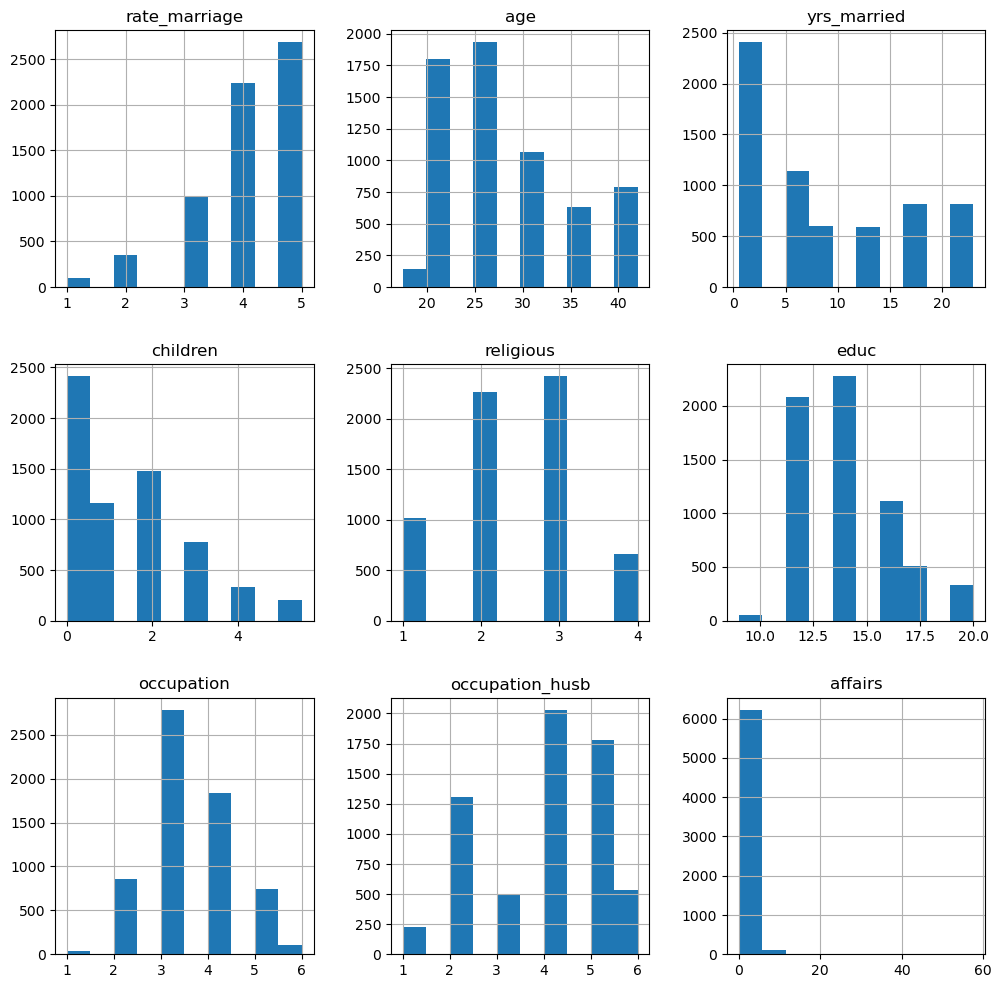

In [22]:
df_fair.hist(figsize=(12,12))
plt.show()

The pandas correlation function compute pairwise correlation of columns, excluding NA/null values.

Documnetation References:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [23]:
corr_v = df_fair.corr() # Correlation function.
corr_v

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [24]:
corr_v.style.background_gradient(cmap='coolwarm')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [25]:
corr_v.style.background_gradient(cmap='magma')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


### Study-1: Poor Marriages
[Return to Table of Contents](#Table-of-Contents)

Let's compare the relationship of a poor marriage and affairs.

#### Chi-Square 
Chi-square test of independence: The hypothesis-testing procedure appropriate when both the independent variable and the dependent variables are categorical.

#### Does having a poor marriage lead to affairs?

Let's create categorical data and add them as two new columns into our dataframe. <br>
 - Poor Marriage = yes, if rate_marriage <= 2 <br>
 - Affair = yes, if affair > 0

In [26]:
# Creat two derived features with poor_marriage_yn and affairs_yn.
df_fair_v2 = df_fair.assign(poor_marriage_yn = (df_fair.rate_marriage <= 2), 
                            affairs_yn = (df_fair.affairs > 0))
df_fair_v2.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,poor_marriage_yn,affairs_yn
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,False,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,False,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,False,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,False,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,False,True


In [27]:
df_fair_v2.poor_marriage_yn.value_counts()

False    5919
True      447
Name: poor_marriage_yn, dtype: int64

In [28]:
df_fair_v2.affairs_yn.value_counts()

False    4313
True     2053
Name: affairs_yn, dtype: int64

In [29]:
df = (df_fair_v2.groupby(['poor_marriage_yn', 'affairs_yn'])[['affairs']].count().unstack().droplevel(axis=1, level=0))
df

affairs_yn,False,True
poor_marriage_yn,,
False,4161,1758
True,152,295


Note that we know the numbers of poor marriages, we know the number of affairs but we don't know whether those pieces of data come from the same couples. In other words, these are two independent groups of observations.

Hypothesis: Assume the affair proportions are equal among poor marriages and non-poor marriages. <br>
In other other our words: <br>
Null hypothesis is that "there is no correlation between marriage poornees and having affairs.

In [30]:
chi2, p, dof, ex = stats.chi2_contingency(df, correction=False)
print('chi2:', chi2)
print('p-value:', p)

chi2: 250.57470442229175
p-value: 1.9460298519537103e-56


p-value is 0 (in fact, it is a very small number, almost zero). This means that we have to reject the null hypothesis!<br>

In fact, we could come up with the same claim just by looking at the normalized/scaled version of df. See below. Affair ratio is 30% among "non-poor marriages" and 66% among "poor marriages". So they don't have same means!

In [31]:
df_pct = df.apply(axis=1, func=lambda r: r/r.sum()) #
df_pct

affairs_yn,False,True
poor_marriage_yn,,
False,0.702990,0.297010
True,0.340045,0.659955


Let's visualize this with SNS

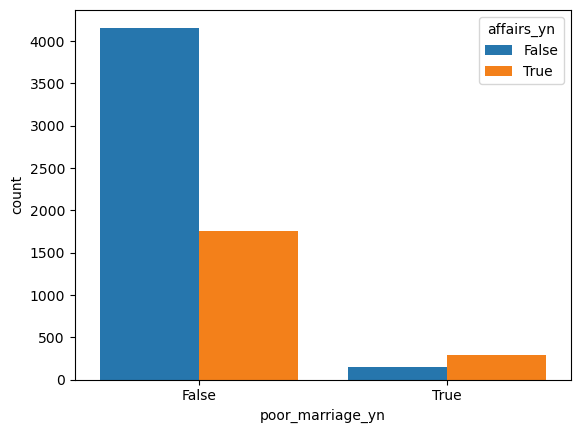

In [32]:
sns.countplot(data=df_fair_v2,x='poor_marriage_yn', hue='affairs_yn', saturation=0.9);

#### Welch's t-test
We could have used Welch's t-test to answer the same question.

In this case, we will compare the average affair count among two groups: poor marriages and non-poor marriages!

In [33]:
# First, let's check the describe function.
df_fair_v2.groupby('poor_marriage_yn').affairs.describe().T

poor_marriage_yn,False,True
count,5919.000000,447.000000
mean,0.643549,1.524038
std,2.116982,3.015937
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.532609
75%,0.347826,1.507691
max,57.599991,26.879990


In [34]:
# They definitely have very different means!
# Affair values among poor marriages
a = df_fair_v2[df_fair_v2.poor_marriage_yn].affairs
# Affair values among non-poor marriages
b = df_fair_v2[~df_fair_v2.poor_marriage_yn].affairs

# Welch's T-Test
tstats, pvalue = stats.ttest_ind(a, b, equal_var=False) # Welch's T-Test when "equal_var = False". See documentation.
format(pvalue, '.3g') # P-value

'2.74e-09'

P-value is very small number, almost zero. This means that we have to reject the null hypothesis! We can visualize the means and as previously confirm they are not the same as previously thought.

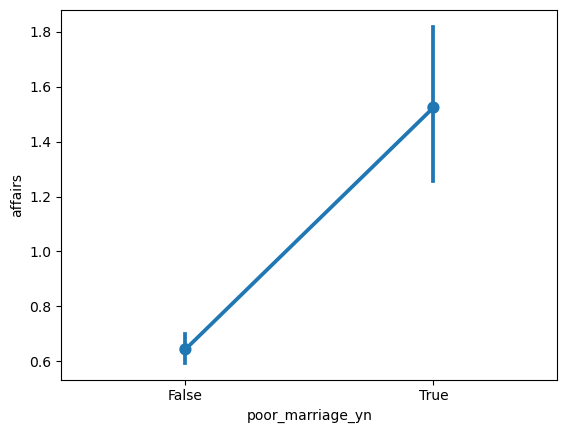

In [35]:
# Let's visualize the data and we can observe that the means are not the same as previously thought.
sns.pointplot(data = df_fair_v2, x='poor_marriage_yn', y='affairs');

### Fisher’s Exact Test
Fisher’s Exact Test is a statistical test used to determine if the proportions of categories in two group variables significantly differ from each other.

In [36]:
# Perform a Fisher exact test on a 2x2 contingency table.
oddsr, p = stats.fisher_exact(table = df, alternative='two-sided')
display(oddsr ,p)

4.593643344709897

4.72822285337081e-52

The p-value is less than 0.05, these two categories are significanty different than each other.

## Study-2: Occupations
[Return to Table of Contents](#Table-of-Contents)

Let's now compare the relationships between occupations and affairs.

### Chi-Square 

Null Hypothesis: There is no difference among farmers and business people in terms of affair averages.

In [37]:
df_v3 = df_fair_v2[df_fair_v2.occupation.isin([2, 6])] # Occupation 2 and 6, farmers and business occupations respectively.
df_v3.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,poor_marriage_yn,affairs_yn
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,False,True
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,False,True
12,3.0,37.0,16.5,5.5,1.0,12.0,2.0,3.0,0.484848,False,True
26,2.0,27.0,6.0,2.0,2.0,12.0,2.0,5.0,0.166667,True,True
33,4.0,32.0,16.5,5.5,4.0,12.0,2.0,4.0,0.727273,False,True


In [38]:
df_v3_counts = (df_v3.groupby(['occupation', 'affairs_yn'])[['affairs']]
      .count().unstack().droplevel(axis=1, level=0))
df_v3_counts

affairs_yn,False,True
occupation,,
2.0,607,252
6.0,69,40


In [39]:
chi2, p, dof, ex = stats.chi2_contingency(df_v3_counts, correction=False)
print('chi2:', chi2)
print('p-value:', p)

chi2: 2.48780700131057
p-value: 0.11473149115255787


P-value is bigger than 0.05! So we can't reject the null hypothesis. In other words, they have similar affair characteristics!

In [40]:
# Let's normalize the data and we can see that the ratios or percentages are very similar.
df_v3_counts_normalized = df_v3_counts.apply(axis=1, func=lambda r: r/r.sum())
df_v3_counts_normalized

affairs_yn,False,True
occupation,,
2.0,0.706636,0.293364
6.0,0.633028,0.366972


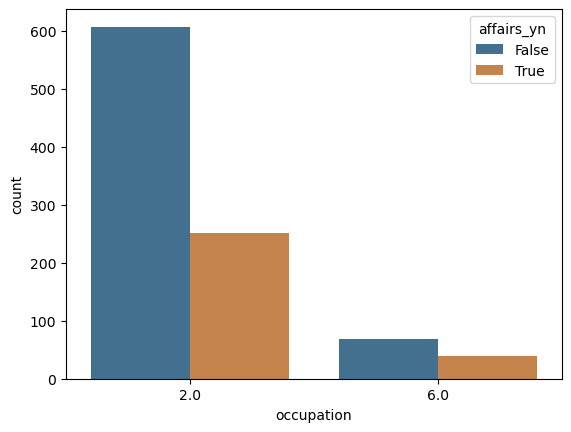

In [41]:
# Let's visualize the count plots.
sns.countplot(data=df_v3, x='occupation', hue='affairs_yn', saturation=0.5);
# Note that true is about half of the false in both occupations.

### Fisher's exact test
[Return to Table of Contents](#Table-of-Contents)

The null hypothesis is that the true odds ratio of the populations underlying the observations is one, and the observations were sampled from these populations under a condition: the marginals of the resulting table must equal those of the observed table. The statistic returned is the unconditional maximum likelihood estimate of the odds ratio, and the p-value is the probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed. There are other possible choices of statistic and two-sided p-value definition associated with Fisher’s exact test; please see the Notes for more information.

The Fisher EXact function returns the prior odds ratio (not a posterior estimate) and probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed.

Documnetation Reference:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html

In [42]:
oddsr, p = stats.fisher_exact(df_v3_counts, alternative='two-sided')
display(oddsr,p)

1.3963653094087878

0.12152936930213742

P-value is larger than 0.05. So these two categories are not significantly different than each other!

### Welch's t-test version
[Return to Table of Contents](#Table-of-Contents)

The ttest_ind function calculate the T-test for the means of two independent samples of scores. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Documentation Reference:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [43]:
df_fair_v2.groupby('occupation').affairs.describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
1.0,41.0,0.426014,1.399035,0.0,0.0,0.0,0.000000,7.839996
2.0,859.0,0.719556,2.375644,0.0,0.0,0.0,0.212121,26.879990
3.0,2783.0,0.755248,2.305594,0.0,0.0,0.0,0.583333,57.599991
4.0,1834.0,0.555920,2.008865,0.0,0.0,0.0,0.076923,38.399994
5.0,740.0,0.815209,1.853575,0.0,0.0,0.0,0.742424,16.799988
6.0,109.0,1.194300,3.291040,0.0,0.0,0.0,1.400000,26.879990


In [44]:
a = df_fair_v2[df_fair_v2.occupation == 2].affairs
b = df_fair_v2[df_fair_v2.occupation == 6].affairs
tstas, pvalue = stats.ttest_ind(a, b, equal_var=False)
print(pvalue)

0.14723018394566767


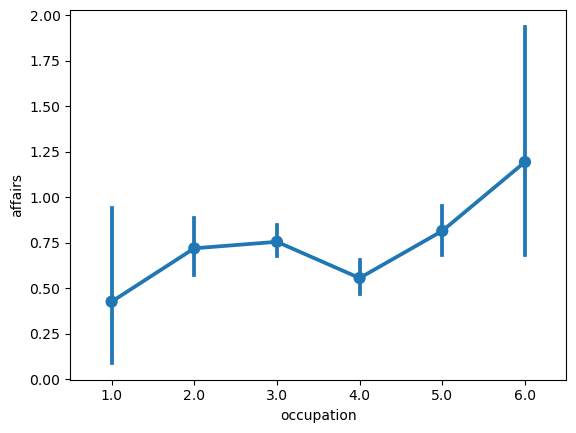

In [45]:
sns.pointplot(x = df_fair_v2.occupation, y = df_fair_v2.affairs);

# Welch's t-test vs. Student's t-test Example (OPTIONAL)
[Return to Table of Contents](#Table-of-Contents)

Student's t-test assumes the two populations have the same variance! If you know this is true, then you can do the student's t-test (i.e., `stats.ttest_ind(a, b)`)

However, most of the time, this is not true and we have to do the Welch's t-test (i.e. `stats.ttest_ind(a, b, equal_var=False)`).

In [46]:
# stats.norm.rvs creates normal continuous random variables.
# The location (loc) keyword specifies the mean.
# The scale (scale) keyword specifies the standard deviation.

# Let's create two sample sets with the same mean and scale but different sizes
group_ctl = stats.norm.rvs(loc=120, scale=5, size=1000)
group_exp = stats.norm.rvs(loc=120, scale=5, size=20)

In [47]:
name_pvalue_pairs = [
    ("Student's t-test", stats.ttest_ind(group_ctl, group_exp).pvalue),
    ("Welch's t-test", stats.ttest_ind(group_ctl, group_exp, equal_var=False).pvalue)]
name_pvalue_pairs.sort(key=lambda x: x[1])

for name, p_value in name_pvalue_pairs:
    print(f'{name:26} {p_value:.4f}  {p_value < 0.05}')

Welch's t-test             0.8435  False
Student's t-test           0.8649  False


Play with the parameters of group_ctl and group_exp above by changing size and try to observe when test scores get closer to each other.

# ANOVA Example
[Return to Table of Contents](#Table-of-Contents)

ANOVA works using the following steps:
- Check sample sizes: equal number of observation in each group
- Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
- Calculate Mean Square error (MSE) (SS error/df of residuals)
- Calculate F-value (MS of group/MSE)
- Calculate p-value based on F value and degrees of freedom (df) 

One way ANOVA Documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [48]:
# Data values for each treatment A, B, C, D.
anova_array = [[25,45,30,54],
               [30,55,29,60],
               [28,29,33,51],
               [36,56,37,62],
               [29,40,27,73]]

In [49]:
df = pd.DataFrame(anova_array, columns =['A', 'B', 'C','D'])
df.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [50]:
# Reshape the dataframe to make it suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# Replace column names
df_melt.columns = ['index', 'treatments', 'value']
print(df_melt.shape)
df_melt.head()

(20, 3)


,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


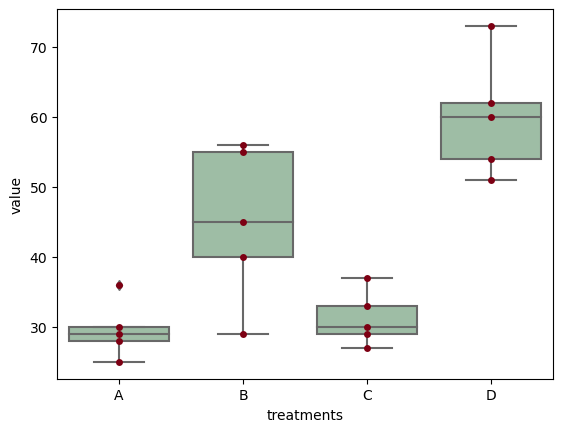

In [51]:
# Boxplot for each treatment categorical value.
sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [52]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


The p-value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

Note on F-value: F value is inversely related to p-value. Higher F-value (greater than F critical value) indicates a significant p-value.

In [53]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we can perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

# NOTEBOOK END